In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise
from scipy import stats

In [3]:
import sys
sys.path.append("../module_2//")

In [4]:
from dataset import MovieDataset
from model import CollaborativeFilteringModel, deepcopy

In [5]:
path = "../../hw2/netflix/"

In [6]:
train_text_path = os.path.join(path, "TrainingRatings.txt")
test_text_path = os.path.join(path, "TestingRatings.txt")

In [7]:
movie = MovieDataset()

In [8]:
train_matrix = movie.fit_transform(train_text_path)

INFO:Unique user count: 28978
INFO:Unique movie user: 1821


In [9]:
train_matrix.shape

(28978, 1821)

In [10]:
model = CollaborativeFilteringModel()

In [33]:
model.fit_model(train_matrix)

/Users/biswadipmandal/Documents/MSCS/Fall_21/CS_6375_ML/homeworks/MLLearn/notebooks/../module_2/model.py:50: RuntimeWarning: invalid value encountered in true_divide
  temp_rating_matrix = temp_rating_matrix / np.sqrt(


In [40]:
normalized_ratings = deepcopy(temp_rating_matrix)

In [65]:
temp_rating_matrix = temp_rating_matrix / np.sqrt(
        np.sum(np.square(temp_rating_matrix), axis=-1))[:, None]

<ipython-input-65-63036b6b9fbb>:1: RuntimeWarning: invalid value encountered in true_divide
  temp_rating_matrix = temp_rating_matrix / np.sqrt(


In [ ]:
normalized_ratings @ temp_rating_matrix.transpose()

In [60]:
kk = _

In [ ]:
model.fit_model(train_matrix)

/Users/biswadipmandal/Documents/MSCS/Fall_21/CS_6375_ML/homeworks/MLLearn/notebooks/../module_2/model.py:50: RuntimeWarning: invalid value encountered in true_divide
  temp_rating_matrix = temp_rating_matrix / np.sqrt(


In [12]:
test_pairs = movie.get_user_movie_index(test_text_path).values

In [13]:
train_pairs = movie.get_user_movie_index(train_text_path).values

In [14]:
test_pairs = test_pairs[:10000]

In [28]:
# pred = model.predict(test_pairs)

In [27]:
test_rating = np.array([float(x) for x in test_pairs[...,2]])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
mean_absolute_error(test_rating, pred)

In [24]:
mean_absolute_error(test_rating, model.get_average_rating(test_pairs))

0.818265069753967

(array([9.5000e+01, 4.0150e+03, 1.6606e+04, 7.7430e+03, 5.0000e+02,
        5.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-0.27096756, -0.14387081, -0.01677405,  0.11032271,  0.23741946,
         0.36451622,  0.49161297,  0.61870973,  0.74580649,  0.87290324,
         1.        ]),
 <BarContainer object of 10 artists>)

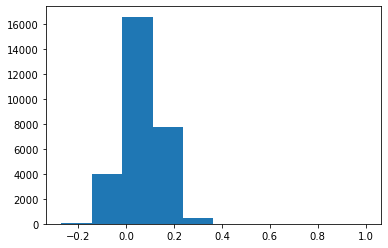

In [27]:
plt.hist(model.similarity[0])

In [16]:
query = test_pairs

In [17]:
query.shape

(10000, 3)

In [18]:
user_indexes = query[..., 1].astype("int")

In [19]:
movie_indexes = query[..., 0].astype("int")

In [20]:
average_user_rating = model.average_ratings[user_indexes]

In [21]:
sim = np.nan_to_num(model.similarity[user_indexes])

(array([2.4800e+02, 8.2670e+03, 1.7608e+04, 2.8210e+03, 3.3000e+01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-0.20133621, -0.08120259,  0.03893103,  0.15906465,  0.27919827,
         0.39933189,  0.51946552,  0.63959914,  0.75973276,  0.87986638,
         1.        ]),
 <BarContainer object of 10 artists>)

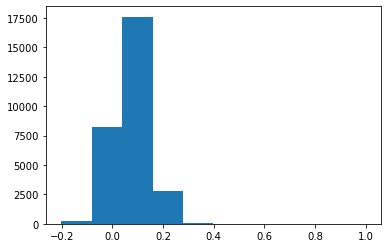

In [43]:
plt.hist(sim[0])

In [47]:
sorted(sim[10], reverse=True)

[0.9999999999999999,
 0.37214237551989265,
 0.36634358468887596,
 0.3598870389604134,
 0.35636081097665784,
 0.34936196258722,
 0.346897509927254,
 0.3468745434186117,
 0.3457374308233389,
 0.34487898502694236,
 0.3422875254713475,
 0.34213060818258506,
 0.34189823415783005,
 0.3382203557766331,
 0.3336207795292329,
 0.33257862293148194,
 0.3317448664566312,
 0.3309658019302519,
 0.3303458631210694,
 0.3275949414532601,
 0.32683856566539565,
 0.3263524404083518,
 0.3261065120890768,
 0.32513831888549527,
 0.32393080558688925,
 0.3234100491441661,
 0.323186748410781,
 0.32313872062954063,
 0.32219564140511864,
 0.3221125489903217,
 0.3216983029553663,
 0.3215240544148285,
 0.32051137225463294,
 0.319629976621063,
 0.31759494003002453,
 0.3154896815507477,
 0.3148199729848804,
 0.3141380761613118,
 0.31390410301908606,
 0.3137324872362414,
 0.3135555579177834,
 0.3131928390268657,
 0.31272942483748734,
 0.31213616929114346,
 0.3107424736774209,
 0.31025031521993496,
 0.30984780370623316,

In [37]:
pred = average_user_rating + 5*np.nan_to_num((sim * model.normalized_ratings[
            ..., movie_indexes].transpose()).sum(1) / np.abs(sim).sum(-1))

<ipython-input-37-586c929f79c2>:1: RuntimeWarning: invalid value encountered in true_divide
  pred = average_user_rating + 5*np.nan_to_num((sim * model.normalized_ratings[


In [38]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [39]:
mean_absolute_error(test_rating, pred)

0.7500408262026849

In [30]:
mean_absolute_error(test_rating, model.get_average_rating(test_pairs))

0.7820001417724407

In [35]:
diff = _

(array([1.4000e+01, 5.3000e+01, 1.4400e+02, 2.6600e+02, 4.4800e+02,
        2.7384e+04, 4.2900e+02, 1.9200e+02, 4.6000e+01, 2.0000e+00]),
 array([-3.32673267, -2.70112654, -2.07552041, -1.44991428, -0.82430816,
        -0.19870203,  0.4269041 ,  1.05251023,  1.67811636,  2.30372249,
         2.92932862]),
 <BarContainer object of 10 artists>)

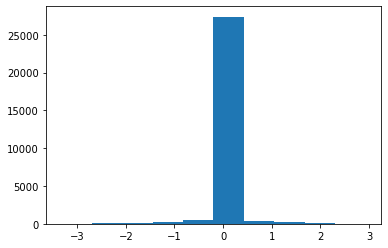

In [45]:
plt.hist(model.normalized_ratings[..., 1])

(array([   4.,   12.,  175., 1380., 1669., 1630., 2546., 2063.,  479.,
          42.]),
 array([-0.2433447 , -0.19316638, -0.14298805, -0.09280972, -0.04263139,
         0.00754694,  0.05772526,  0.10790359,  0.15808192,  0.20826025,
         0.25843858]),
 <BarContainer object of 10 artists>)

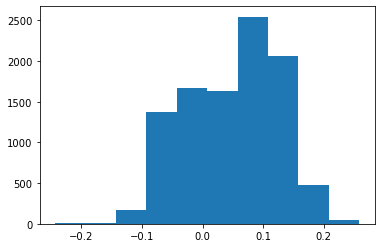

In [38]:
plt.hist(diff)

In [44]:
np.abs(sim).sum(-1)

array([2625.81701707, 1735.19012555, 2359.34640818, ..., 1480.94826585,
       1420.31893306, 1639.50956407])

In [116]:
# for elm in model.rating_matrix[0]:
#     if elm != 0:
#         print(elm)

In [112]:
model.rating_matrix[0].sum() / (model.rating_matrix[0] != 0).sum()

2.8

In [113]:
model.average_ratings

array([2.8       , 3.07432432, 3.36641221, ..., 3.84      , 4.16      ,
       3.12222222])

In [115]:
for elm in model.normalized_ratings[0]:
    if elm != 0:
        print(elm)

-1.7999999999999998
-1.7999999999999998
0.20000000000000018
-0.7999999999999998
1.2000000000000002
-1.7999999999999998
0.20000000000000018
-0.7999999999999998
-0.7999999999999998
-0.7999999999999998
1.2000000000000002
-1.7999999999999998
-0.7999999999999998
0.20000000000000018
0.20000000000000018
1.2000000000000002
2.2
0.20000000000000018
-0.7999999999999998
1.2000000000000002
0.20000000000000018
0.20000000000000018
-1.7999999999999998
0.20000000000000018
-1.7999999999999998
2.2
0.20000000000000018
-0.7999999999999998
1.2000000000000002
0.20000000000000018
0.20000000000000018
0.20000000000000018
0.20000000000000018
-1.7999999999999998
0.20000000000000018
-0.7999999999999998
1.2000000000000002
-0.7999999999999998
1.2000000000000002
1.2000000000000002
0.20000000000000018
0.20000000000000018
-0.7999999999999998
-1.7999999999999998
0.20000000000000018
0.20000000000000018
-0.7999999999999998
1.2000000000000002
-0.7999999999999998
-0.7999999999999998
1.2000000000000002
-0.7999999999999998
-1

In [99]:
model.rating_matrix[0].sum()

238.0

<ipython-input-87-1a87acf6a32f>:1: RuntimeWarning: invalid value encountered in true_divide
  plt.hist(np.nan_to_num((sim * model.normalized_ratings[


(array([  1.,   1.,   2.,  39., 227., 653., 698., 305.,  66.,   8.]),
 array([-0.22401274, -0.19411864, -0.16422455, -0.13433046, -0.10443636,
        -0.07454227, -0.04464817, -0.01475408,  0.01514002,  0.04503411,
         0.0749282 ]),
 <BarContainer object of 10 artists>)

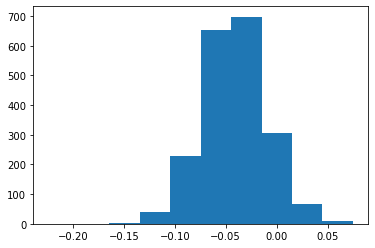

In [87]:
plt.hist(np.nan_to_num((sim * model.normalized_ratings[
            ..., movie_indexes].transpose()).sum(1) / np.abs(sim).sum(-1)))

In [83]:
average_user_rating + np.nan_to_num((sim * model.normalized_ratings[
            ..., movie_indexes].transpose()).sum(1) / np.abs(sim).sum(-1))

<ipython-input-83-391d2a7bc5bb>:1: RuntimeWarning: invalid value encountered in true_divide
  average_user_rating + np.nan_to_num((sim * model.normalized_ratings[


array([2.39480543, 3.09073628, 3.50592165, ..., 3.65124713, 3.77836042,
       3.69414194])

### Toy Dataset

In [10]:
np.count_nonzero(train_matrix, axis=-1).shape

(28978,)

In [163]:
model = CollaborativeFilteringModel()

In [164]:
x = np.array([[3, 0, 0 , 1 ,5 ], [3, 0, 3, 1, 5], [5, 1, 3, 2, 1]])

In [165]:
x

array([[3, 0, 0, 1, 5],
       [3, 0, 3, 1, 5],
       [5, 1, 3, 2, 1]])

In [166]:
x = x.astype("float64")

In [167]:
model.fit_model(x)

In [168]:
model.similarity

array([[ 1.        ,  1.        , -0.21128856],
       [ 1.        ,  1.        , -0.21128856],
       [-0.21128856, -0.21128856,  1.        ]])

In [169]:
query = np.array([[0,2]])
query

array([[0, 2]])

In [170]:
user_indexes = query[..., 0]
movie_indexes = query[..., 1]

In [171]:
movie_indexes

array([2])

In [172]:
average_user_rating = model.average_ratings[user_indexes]

In [173]:
average_user_rating

array([3.])

In [174]:
sim = model.similarity[user_indexes]

In [175]:
average_user_rating + (sim * model.normalized_ratings[..., movie_indexes].transpose()).sum(1) / sim.sum(-1)

array([1.25194099])

In [176]:
model.predict(query)

array([1.25194099])